# EDA & Quick Baseline
This notebook runs EDA and a quick TF-IDF + Logistic baseline for the MBTI dataset.


In [6]:
import pandas as pd
import sys, os
sys.path.append(os.path.abspath("D:/Progamming/Progamming_courses/Quorsk/project/src"))

from data import load_data, add_binary_columns, explode_posts
df = load_data('D:\Progamming\Progamming_courses\Quorsk\project\data\mbti_1.csv')
df = add_binary_columns(df)
display(df.head())


Số mẫu: 8675
Số loại MBTI khác nhau: 16
type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64


,type,posts,mbti_IE,mbti_NS,mbti_TF,mbti_JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0,0,1,0
1,ENTP,'I'm finding the lack of me in these posts ver...,1,0,0,1
2,INTP,'Good one _____ https://www.youtube.com/wat...,0,0,0,1
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0,0,0,0
4,ENTJ,'You're fired.|||That's another silly misconce...,1,0,0,0


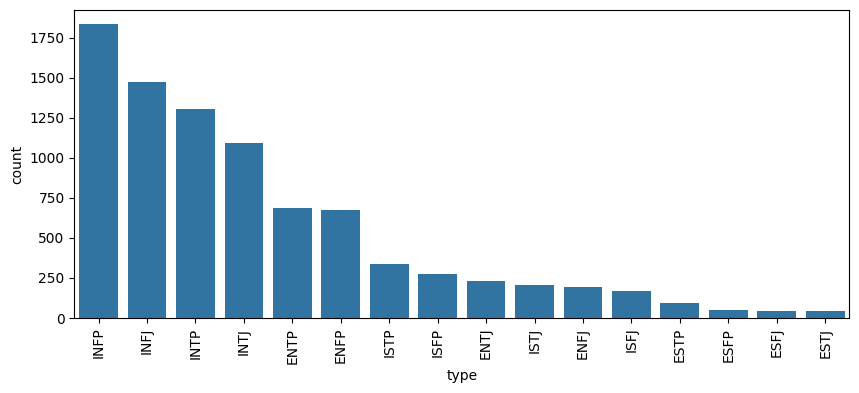

In [7]:
# Quick distribution plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


In [8]:
# Quick TF-IDF baseline (single axis example)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

df['text'] = df['posts'].fillna('').astype(str).str.replace('///',' ').str.replace('|||',' ')
X = df['text']
y = df['type'].apply(lambda x: 0 if x[0]=='I' else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
vec = TfidfVectorizer(max_features=10000)
Xtr = vec.fit_transform(X_train)
Xte = vec.transform(X_test)
clf = LogisticRegression(max_iter=1000)
clf.fit(Xtr, y_train)
yp = clf.predict(Xte)
print('Acc', accuracy_score(y_test, yp), 'F1', f1_score(y_test, yp))


Acc 0.8253602305475505 F1 0.45207956600361665
